In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

<ipython-input-1-5b489f4d910b>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [3]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

df_train = pd.read_csv('dataset/sales_train.csv')

In [3]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
print(df_train.shape)
df_train.dtypes

(2935849, 6)


date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [4]:
df_train = df_train.groupby(['date_block_num' , 'shop_id' , 'item_id']).agg({'item_cnt_day': 'sum'}).reset_index()
df_train.head()
#df_train.tail(20)

,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0


In [6]:
df_train = df_train.groupby(['date_block_num']).agg({'item_cnt_day': 'sum'})
df_train.head()

,item_cnt_day
date_block_num,
0,131479.0
1,128090.0
2,147142.0
3,107190.0
4,106970.0


In [7]:
max(df_train['item_cnt_day'])
#min(df_train['item_cnt_day'])

183342.0

<AxesSubplot:xlabel='date_block_num'>

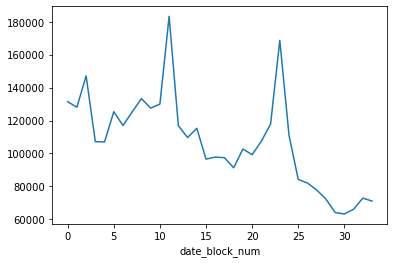

In [7]:
df_train['item_cnt_day'].plot(kind='line')

In [8]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_train['item_cnt_day'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.395704
p-value: 0.142953


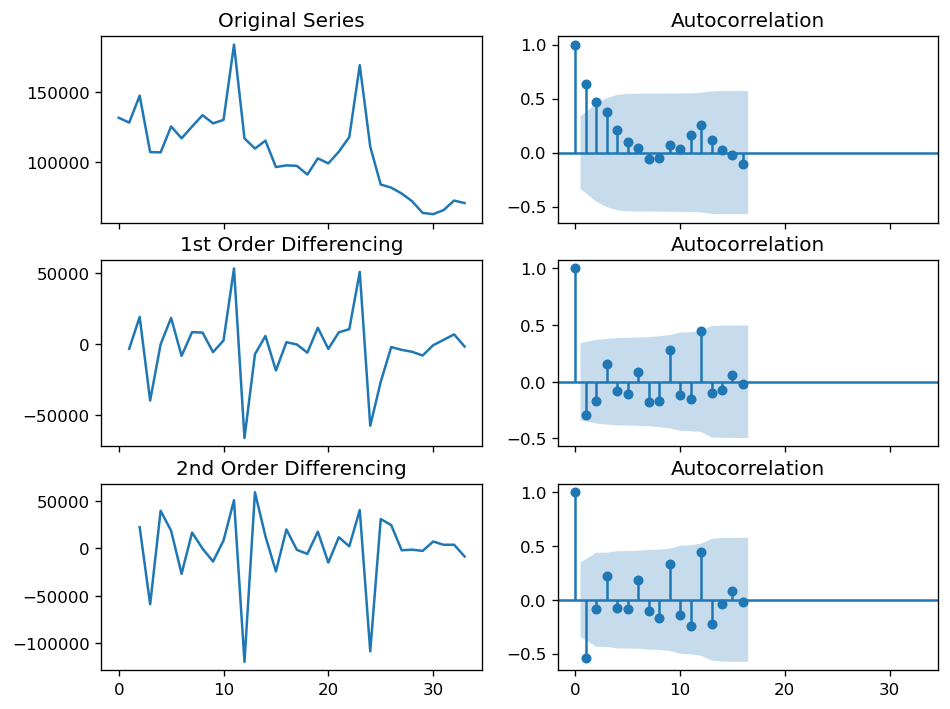

In [9]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = df_train['item_cnt_day']

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df); axes[0, 0].set_title('Original Series')
plot_acf(df, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.diff().diff().dropna(), ax=axes[2, 1])

plt.show()


# How to find the order of the AR term (p)

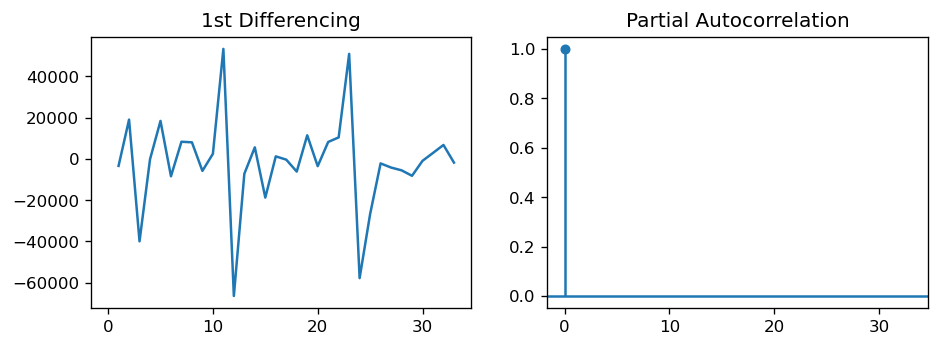

In [10]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.diff().dropna()); axes[0].set_title('1st Differencing')
plot_pacf(df.diff(),ax=axes[1])

plt.show()

# How to find the order of the MA term (q)

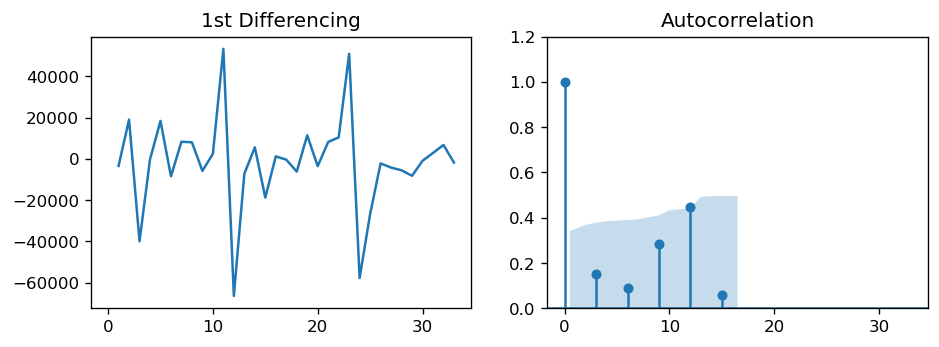

In [11]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.diff().dropna(), ax=axes[1])

plt.show()

# Splitting DataSet 

In [12]:
df = df_train['item_cnt_day']
train=df[:24]
test=df[24:]

# Creating ARIMA Model

In [13]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)

#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average mode
model = ARIMA(df, order=(1,1,0))
model_fit = model.fit(disp=-1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.item_cnt_day   No. Observations:                   33
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -376.722
Method:                       css-mle   S.D. of innovations          21930.682
Date:                Thu, 16 Sep 2021   AIC                            759.445
Time:                        12:50:10   BIC                            763.934
Sample:                             1   HQIC                           760.955
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1831.0000   3000.201     -0.610      0.542   -7711.286    4049.286
ar.L1.D.item_cnt_day    -0.2810      0.164     -1.716      0.086      -0.602       0.040
            

/home/shafayet/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


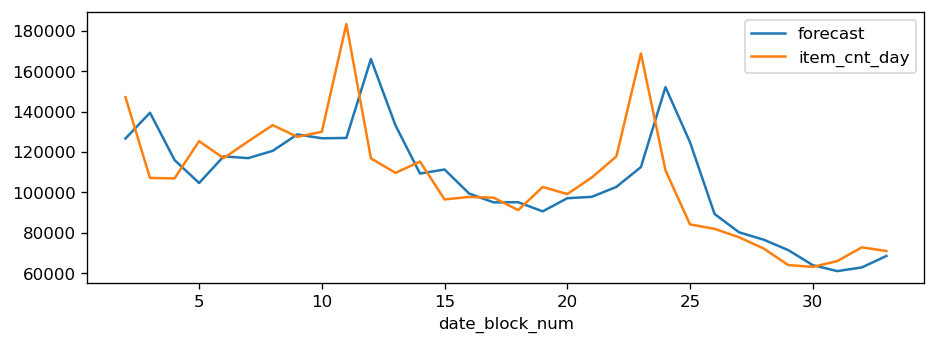

In [14]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

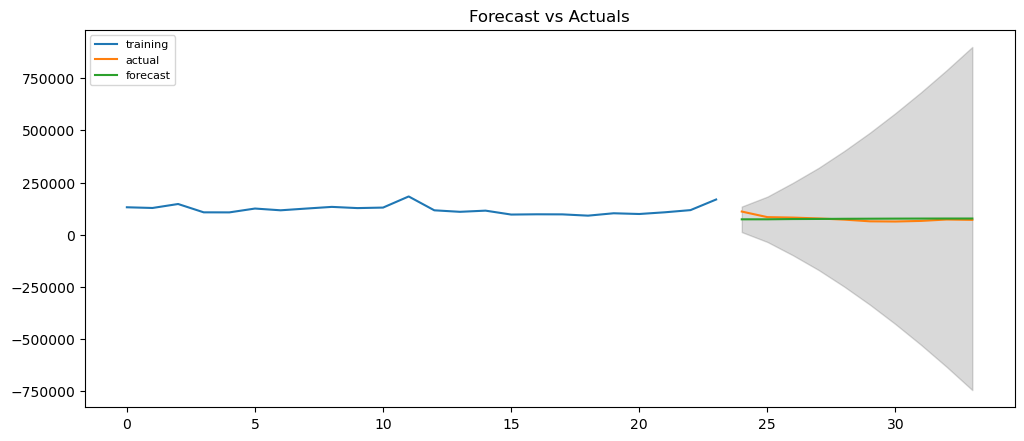

In [35]:
model = ARIMA(df, order=(1,2,0))
#model_fit = model.fit(disp=-1)
#print(model_fit.summary())

fitted = model.fit(disp=-1)
# Forecast
fc, se, conf = fitted.forecast(10, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [96]:
lis=test.tolist()
for i in range(0,10):
    print(int(fc[i]),int(lis[i]))

66896 110971
65924 84198
64184 82014
61837 77827
60005 72295
58117 64114
56099 63187
54159 66079
52222 72843
50260 71056


# Model Evaluation of ARIMA

In [36]:
#Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
   
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr})

forecast_accuracy(fc, test.values)

{'mape': 0.13683134888899826,
 'me': -443.71906866634527,
 'mae': 10965.994239794734,
 'mpe': 0.021802570822669266,
 'rmse': 14518.759804124817,
 'corr': -0.8289126283172648}

In [110]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
#pdq

In [111]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 551.7403350043967
(0, 0, 1) 551.0251098489755
(0, 0, 2) 552.9200436041581
(0, 0, 3) 553.4659814731883
(0, 0, 4) 555.2497294157895
(0, 1, 0) 533.0267233598554
(0, 1, 1) 532.1990624377243
(0, 1, 2) 534.1911583309703
(0, 1, 3) 535.1410767955913
(0, 1, 4) 537.098881941082
(0, 2, 0) 529.8794062056038
(0, 2, 1) 515.266062454973
(0, 2, 2) 515.4483265426903
(0, 2, 3) 516.8993795383944
(0, 2, 4) 516.9488663567029
(1, 0, 0) 550.5850900832716
(1, 0, 1) 552.4945806697931
(1, 1, 0) 532.8344209943094
(1, 1, 1) 532.9198705150624
(1, 1, 2) 535.9853270131458
(1, 1, 3) 537.1170477231825
(1, 1, 4) 539.0375780109518
(1, 2, 0) 523.4604584399741
(1, 2, 1) 515.4654572836857
(1, 2, 2) 517.061797351832
(1, 2, 3) 518.8703966488262
(1, 2, 4) 518.9485520192968
(2, 0, 0) 552.5054181502571
(2, 0, 1) 554.4927280047636
(2, 0, 2) 556.34615618754
(2, 1, 0) 533.5206480528601
(2, 1, 1) 535.1942145606114
(2, 2, 0) 515.6630543668095
(2, 2, 1) 515.8564636704291
(2, 2, 2) 517.8557181708962
(3, 0, 0) 554.35599596951

# Seosan ARIMA Model

In [31]:
# !pip3 install pyramid-arima
import pmdarima as pm
smodel = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=5, max_q=5, m=1,
                         seasonal=True,
                         d=None, D=None, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=751.045, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=766.689, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=758.722, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=749.177, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=753.003, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=749.331, Time=0.07 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.334 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   34
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -372.588
Date:                Thu, 16 Sep 2021   AIC                            749.177
Time:                        12:54:57   BIC                            752.108
Sample:                             0   HQIC                           750.149
                                 - 34                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9130      0.185     -4.943      0.000      -1.275      -0.551
sigma2      7.181e+08   1.87e-10   3.84e+18      0.000    7.18e+08    7.18e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                 8.31
Prob(Q):                              0.43   Prob(JB):                         0.02
Heteroskedasticity (H):               0.49   Skew:                            -0.81
Prob(H) (two-sided):                  0.26   Kurtosis:                         4.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.03e+34. Standard errors may be unstable.
"""

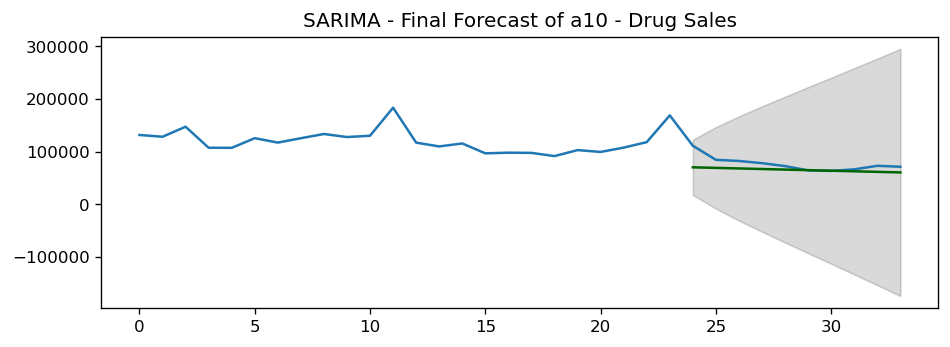

In [32]:
# Forecast
n_periods = 10
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)


# make series for plotting purpose
fitted_series = pd.Series(fitted, index=test.index)
lower_series = pd.Series(confint[:, 0], index=test.index)
upper_series = pd.Series(confint[:, 1], index=test.index)

# Plot
plt.plot(df)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

# Model Evaluation of SARIMA

In [33]:
#Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
   
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr})

forecast_accuracy(fitted, test.values)

{'mape': 0.13373114312879314,
 'me': -11360.233265628272,
 'mae': 11506.002994603998,
 'mpe': -0.13144443843639403,
 'rmse': 15965.481768507123,
 'corr': 0.7444489778119355}

In [120]:
print( confint)

[[  17442.14759103  122503.36758511]
 [  -8707.13414703  146486.1644993 ]
 [ -31325.26003914  166937.80556755]
 [ -52519.00591561  185965.06662015]
 [ -73060.54744378  204340.12332446]
 [ -93323.64974758  222436.7408044 ]
 [-113516.86069169  240463.46692464]
 [-133767.03171479  258547.15312388]
 [-154155.82887034  276769.46545555]
 [-174737.90209046  295185.05385181]]


In [55]:
lis=test.tolist()
for i in range(0,10):
    print(int(fitted[i]),int(lis[i]))

69972 110971
68889 84198
67806 82014
66723 77827
65639 72295
64556 64114
63473 63187
62390 66079
61306 72843
60223 71056
